In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [6]:
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


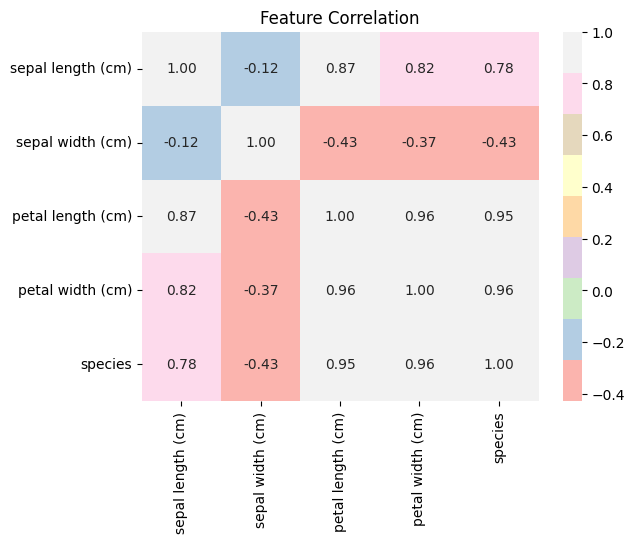

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='Pastel1', fmt=".2f")
plt.title("Feature Correlation")
plt.show()


In [8]:
x=df.drop('species', axis=1)
y=df['species']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
y_pred=model.predict(x_test)


In [12]:
model.predict([[7.0,5,9,0.7]])

C:\Users\Richee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

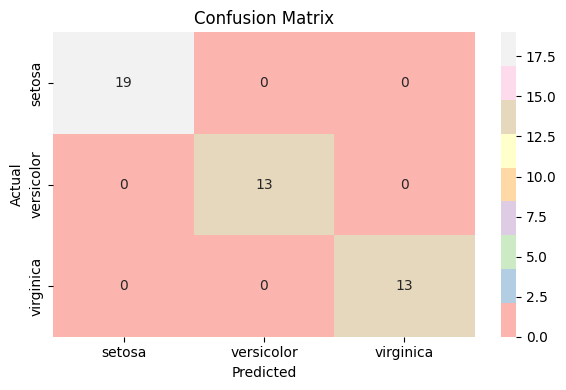

In [13]:
cm = confusion_matrix(y_test, y_pred)
labels = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

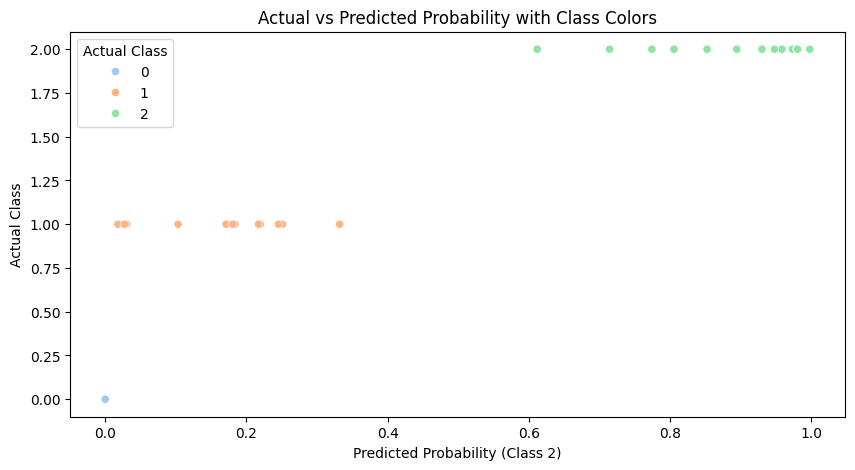

In [ ]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=y_pred_prob[:, 2], y=y_test, hue=y_test, palette="pastel", legend="full")
plt.xlabel("Predicted Probability (Class 2)")
plt.ylabel("Actual Class")
plt.title("Actual vs Predicted Probability with Class Colors")
plt.legend(title="Actual Class")
plt.show()


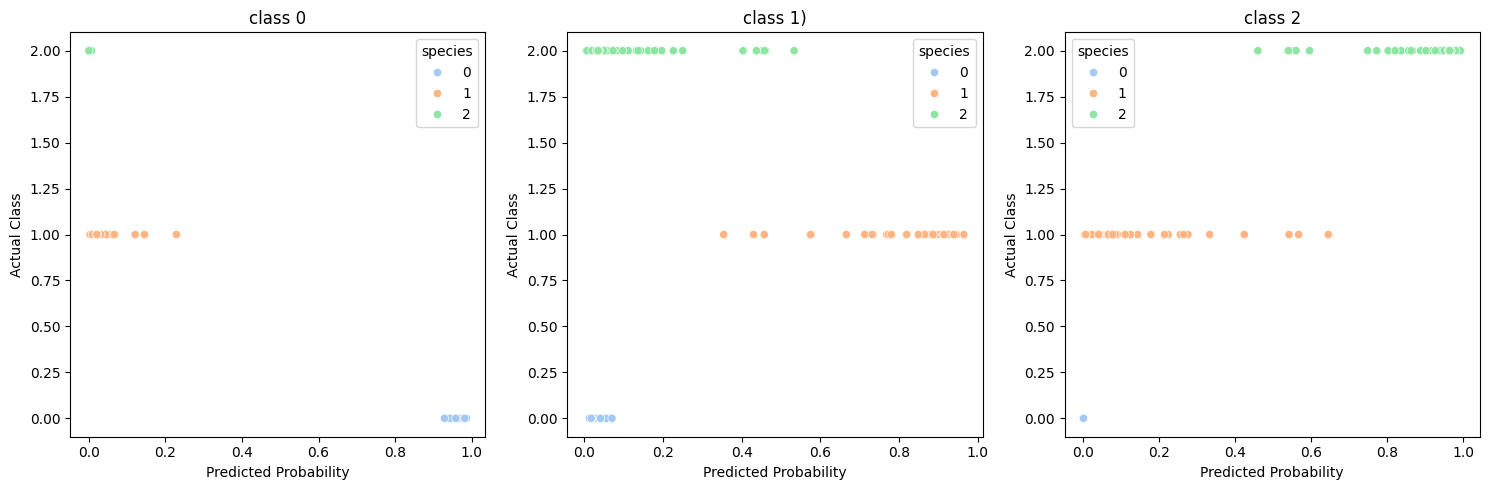

In [ ]:

y_pred_prob = model.predict_proba(x_train)  
plt.figure(figsize=(15, 5))

#Class 0
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred_prob[:, 0], y=y_train, hue=y_train, palette="pastel")
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Class")
plt.title("class 0")

#Class 1
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_prob[:, 1], y=y_train, hue=y_train, palette="pastel")
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Class")
plt.title("class 1)")

#Class 2
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_pred_prob[:, 2], y=y_train, hue=y_train, palette="pastel")
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Class")
plt.title("class 2")

plt.tight_layout()
plt.show()

In [ ]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

